<a href="https://colab.research.google.com/github/zambenetti/2daEntregaCoderhouse/blob/main/2da_Entrega_Proyecto_Final_Victor_Zambenetti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2da. Entrega del Proyecto Final

##Abstracto con Motivación y Audiencia

Mi motivación, consiste en lograr comunicar y difundir las variables más importantes y significativas que impactan en la Economía Argentina, y que el ciudadano común desconoce o no comprende, como, por ejemplo: “El aumento de la Base Monetaria”, “El aumento del dólar Libre”, “El aumento de la inflación”, “El aumento de la Tasa de Interés”, etc.

Mi principal audiencia se encuentra en el “ciudadano común”, y como audiencia secundaria, ubico a, administradores públicos, empresarios, emprendedores y toda aquella persona que le interese analizar o investigar, el tipo de variables con las que trabajaré.

Por lo tanto, mi principal objetivo, es lograr, con el Dataset que se presenta, transmitir de manera simple, algunas variables y relaciones que existen en la estructura, contable, económica y financiera del Estado Argentino.


##Preguntas/Hipótesis que queremos Responder

La pregunta principal a responder es, ¿Cuáles son las variables más significativas que definen el valor del dólar?

Otras preguntas son:

¿Con los datos provistos, se puede estimar cuánto podría valer el Dólar Libre, dentro de 24 semanas?

¿Cómo podría construirse una estimación del valor del dólar libre?

Hipótesis: El valor estimado del dólar en la variable “DolarManualCalculo/Reservas” es un buen indicador del valor del dólar libre desfasado en 24 semanas.


##Análisis Exploratorio de Datos (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import locale

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Base de Datos Integral con toda la información Contable, Macroeconómica, Cambiaria y Financiera entre el 2006 y 2021 y sus Hitos Históricos
Proyecto = pd.read_excel("/content/drive/MyDrive/Desafios Coderhouse/Desafio 12 Segunda Entrega Proyecto Final/DATASET-FINAL-Desfazado-SIN-Formulas-InterpolarizadoFinal-14-09-2023.xlsx")
Proyecto

NroSemana FechaSemana   Año  EleccionesPresidente  \
0            1  2006-01-07  2006                     0   
1            2  2006-01-14  2006                     0   
2            3  2006-01-21  2006                     0   
3            4  2006-01-28  2006                     0   
4            5  2006-02-04  2006                     0   
..         ...         ...   ...                   ...   
843        844  2021-12-09  2021                     0   
844        845  2021-12-16  2021                     0   
845        846  2021-12-23  2021                     0   
846        847  2021-12-30  2021                     0   
847        848  2021-12-31  2021                     0   

     VolatilidadInestabilidad  Habia Cepo      Recursos  RecursosAcumulado  \
0                           0           0  0.000000e+00       0.000000e+00   
1                           0           0  0.000000e+00       0.000000e+00   
2                           0           0  0.000000e+00       0.000000e+00   
3                           0           0  4.231208e+09       4.231208e+09   
4                           0           0  3.926874e+09       8.158082e+09   
..                        ...         ...           ...                ...   
843                         0           1  1.376860e+11       7.976463e+12   
844                         0           1  6.073883e+10       8.037201e+12   
845                         0           1  2.894250e+11       8.326626e+12   
846                         0           1  1.585962e+11       8.485222e+12   
847                         0           1  1.821530e+11       8.667376e+12   

           Gastos  GastosAcumulado  ...  EMAETendenciaCiclo  \
0    0.000000e+00     0.000000e+00  ...          112.681311   
1    0.000000e+00     0.000000e+00  ...          112.681311   
2    0.000000e+00     0.000000e+00  ...          112.681311   
3    3.405969e+09     3.405969e+09  ...          112.681311   
4    2.170770e+09     5.576739e+09  ...          113.464197   
..            ...              ...  ...                 ...   
843  4.543818e+11     9.219361e+12  ...          147.020436   
844  1.868933e+11     9.406254e+12  ...          147.020436   
845  3.057682e+11     9.712023e+12  ...          147.020436   
846  7.170822e+11     1.042910e+13  ...          147.020436   
847  3.340592e+11     1.076316e+13  ...          147.020436   

     VarTendenciaCicloRespectoMesAnterior  SumoBaseMonetTitulosOblig  \
0                                0.668736               8.954188e+10   
1                                0.668736               8.992242e+10   
2                                0.668736               9.020395e+10   
3                                0.668736               9.059158e+10   
4                                0.694780               8.875241e+10   
..                                    ...                        ...   
843                              0.571230               1.248447e+13   
844                              0.571230               1.254044e+13   
845                              0.571230               1.331530e+13   
846                              0.571230               1.360580e+13   
847                              0.571230               1.389630e+13   

     BASEMONETARIATITULOS/Reservas  BaseMonetaria/Reservas  \
0                         4.779259                3.198790   
1                         4.767838                3.209001   
2                         4.726559                3.141368   
3                         4.601086                3.036630   
4                         4.464495                2.961393   
..                             ...                     ...   
843                     193.574626               78.968138   
844                     192.468129               77.779935   
845                     215.702039               89.124281   
846                     217.521167               90.635973   
847                     219.317083               92.128377   

    

In [4]:
Proyecto.columns

Index(['NroSemana', 'FechaSemana', 'Año', 'EleccionesPresidente',
       'VolatilidadInestabilidad', 'Habia Cepo', 'Recursos',
       'RecursosAcumulado', 'Gastos', 'GastosAcumulado',
       'SuperavitDeficitSemanal', 'SuperavitDeficitAcumulado', 'Exportaciones',
       'Importaciones', 'SaldoBalanzaComercial', 'ConsumoPrivado',
       'ConsumoPublico', 'VariacionExistencias', 'Inversion', 'PIBCORRIENTES',
       'PIBCONSTANTES2004', 'VariacionPBIConstantes',
       'DeudaPublicaPasivoPesos', 'DeudaPublicaPasivoDolares', 'DeudaPBIPesos',
       'PrecionTributariaPBI', 'BaseMonetariaPesos', 'ReservasBCRAUSD',
       'VariacionReservasBCRAUSD', 'ReservasBCRAPESOS',
       'VariacionReservasBCRAPESOS', 'DerechoOpTerminoYPaseBCRA (Activo)',
       'TitulosEmitBCRA (Pasivo)', 'ObligOpTerminoYPase (Pasivo)',
       'TotalActivoBCRA', 'TotalPasivoBCRA', 'PasivoActivoBCRA',
       'PasivoBCRAPIB', 'Inflacion', 'InflacionAcumulada', 'TasaBadlar',
       'TasaEfectiva30dias', 'MervalCierre', 'Ta

In [5]:
# Confirmamos que no haya datos nulos
null_counts = Proyecto.isnull().sum()
print(null_counts)

NroSemana                                   0
FechaSemana                                 0
Año                                         0
EleccionesPresidente                        0
VolatilidadInestabilidad                    0
Habia Cepo                                  0
Recursos                                    0
RecursosAcumulado                           0
Gastos                                      0
GastosAcumulado                             0
SuperavitDeficitSemanal                     0
SuperavitDeficitAcumulado                   0
Exportaciones                               0
Importaciones                               0
SaldoBalanzaComercial                       0
ConsumoPrivado                              0
ConsumoPublico                              0
VariacionExistencias                        0
Inversion                                   0
PIBCORRIENTES                               0
PIBCONSTANTES2004                           0
VariacionPBIConstantes            

In [6]:
#Tipo de dato de cada columna
TiposdeDatos = Proyecto.dtypes
TiposdeDatos

NroSemana                                            int64
FechaSemana                                 datetime64[ns]
Año                                                  int64
EleccionesPresidente                                 int64
VolatilidadInestabilidad                             int64
Habia Cepo                                           int64
Recursos                                           float64
RecursosAcumulado                                  float64
Gastos                                             float64
GastosAcumulado                                    float64
SuperavitDeficitSemanal                            float64
SuperavitDeficitAcumulado                          float64
Exportaciones                                      float64
Importaciones                                      float64
SaldoBalanzaComercial                              float64
ConsumoPrivado                                     float64
ConsumoPublico                                     float

In [7]:
TiposdeDatos.to_excel("/content/drive/MyDrive/Desafios Coderhouse/Desafio 12 Segunda Entrega Proyecto Final/tiposdedatos.xlsx")

In [8]:
#Totalidad de registros por columnas
Proyecto.count()

NroSemana                                   848
FechaSemana                                 848
Año                                         848
EleccionesPresidente                        848
VolatilidadInestabilidad                    848
Habia Cepo                                  848
Recursos                                    848
RecursosAcumulado                           848
Gastos                                      848
GastosAcumulado                             848
SuperavitDeficitSemanal                     848
SuperavitDeficitAcumulado                   848
Exportaciones                               848
Importaciones                               848
SaldoBalanzaComercial                       848
ConsumoPrivado                              848
ConsumoPublico                              848
VariacionExistencias                        848
Inversion                                   848
PIBCORRIENTES                               848
PIBCONSTANTES2004                       

In [9]:
Proyecto.corr(method = 'spearman') # Debido a que agregué nuevas variables a mi Dataset, quiero ver nuevamente las correlaciones

<ipython-input-9-efcb08458a44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Proyecto.corr(method = 'spearman') # Debido a que agregué nuevas variables a mi Dataset, quiero ver nuevamente las correlaciones


NroSemana       Año  \
NroSemana                                  1.000000  0.998046   
Año                                        0.998046  1.000000   
EleccionesPresidente                       0.023346  0.018378   
VolatilidadInestabilidad                   0.475069  0.476594   
Habia Cepo                                 0.425624  0.422394   
Recursos                                   0.828526  0.819311   
RecursosAcumulado                          0.806238  0.772960   
Gastos                                     0.793237  0.779213   
GastosAcumulado                            0.786399  0.752501   
SuperavitDeficitSemanal                   -0.132668 -0.125927   
SuperavitDeficitAcumulado                 -0.680320 -0.662039   
Exportaciones                              0.991049  0.987519   
Importaciones                              0.993355  0.990242   
SaldoBalanzaComercial                      0.151911  0.147477   
ConsumoPrivado                             0.998763  0.997828   
ConsumoPublico                             0.999297  0.995827   
VariacionExistencias                       0.465306  0.432140   
Inversion                                  0.994591  0.991870   
PIBCORRIENTES                              0.999210  0.997286   
PIBCONSTANTES2004                          0.396899  0.394671   
VariacionPBIConstantes                    -0.388356 -0.389144   
DeudaPublicaPasivoPesos                    0.999373  0.997606   
DeudaPublicaPasivoDolares                  0.978240  0.975583   
DeudaPBIPesos                              0.486448  0.487391   
PrecionTributariaPBI                       0.366929  0.367647   
BaseMonetariaPesos                         0.998333  0.996160   
ReservasBCRAUSD                            0.014747  0.020733   
VariacionReservasBCRAUSD                  -0.235027 -0.233043   
ReservasBCRAPESOS                          0.986161  0.985994   
VariacionReservasBCRAPESOS                 0.173078  0.177632   
DerechoOpTerminoYPaseBCRA (Activo)         0.936749  0.937363   
TitulosEmitBCRA (Pasivo)                   0.980233  0.980086   
ObligOpTerminoYPase (Pasivo)               0.941236  0.941737   
TotalActivoBCRA                            0.998834  0.997590   
TotalPasivoBCRA                            0.999541  0.997853   
PasivoActivoBCRA                           0.388280  0.377694   
PasivoBCRAPIB                              0.665483  0.668318   
Inflacion                                  0.827786  0.828413   
InflacionAcumulada                         0.999986  0.998059   
TasaBadlar                                 0.908471  0.902533   
TasaEfectiva30dias                         0.908471  0.902533   
MervalCierre                               0.970959  0.969838   
TasaEEUUFed                               -0.209230 -0.206998   
ICCDitella                                -0.533392 -0.534170   
EMAE                                       0.393120  0.393379   
VarRespectoIgualPeriodoAnterior           -0.357811 -0.358391   
EMAEIndiceDesestacionalizada               0.437283  0.433238   
VarDesestacionalizadaRespectoMesAnterior  -0.037894 -0.041731   
EMAETendenciaCiclo                         0.496828  0.495066   
VarTendenciaCicloRespectoMesAnterior      -0.358871 -0.360149   
SumoBaseMonetTitulosOblig                  0.998043  0.996821   
BASEMONETARIATITULOS/Reservas              0.956375  0.953555   
BaseMonetaria/Reservas                     0.962164  0.959347   
DolarManualCALCULO/Reservas                0.968631  0.967125   
DolarOficialBNA                            0.995999  0.994491   
DolarLibrediaAnterior                      0.994900  0.993163   
DolarLibre                                 0.994900  0.993119   
DolarDesfazado24Semanas                    0.995688  0.993500   

                                          EleccionesPresidente  \
NroSemana                                             0.023346   
Año                                                   0.018378   
Eleccion

<ipython-input-10-838927eeb481>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Proyecto.corr(method='spearman')


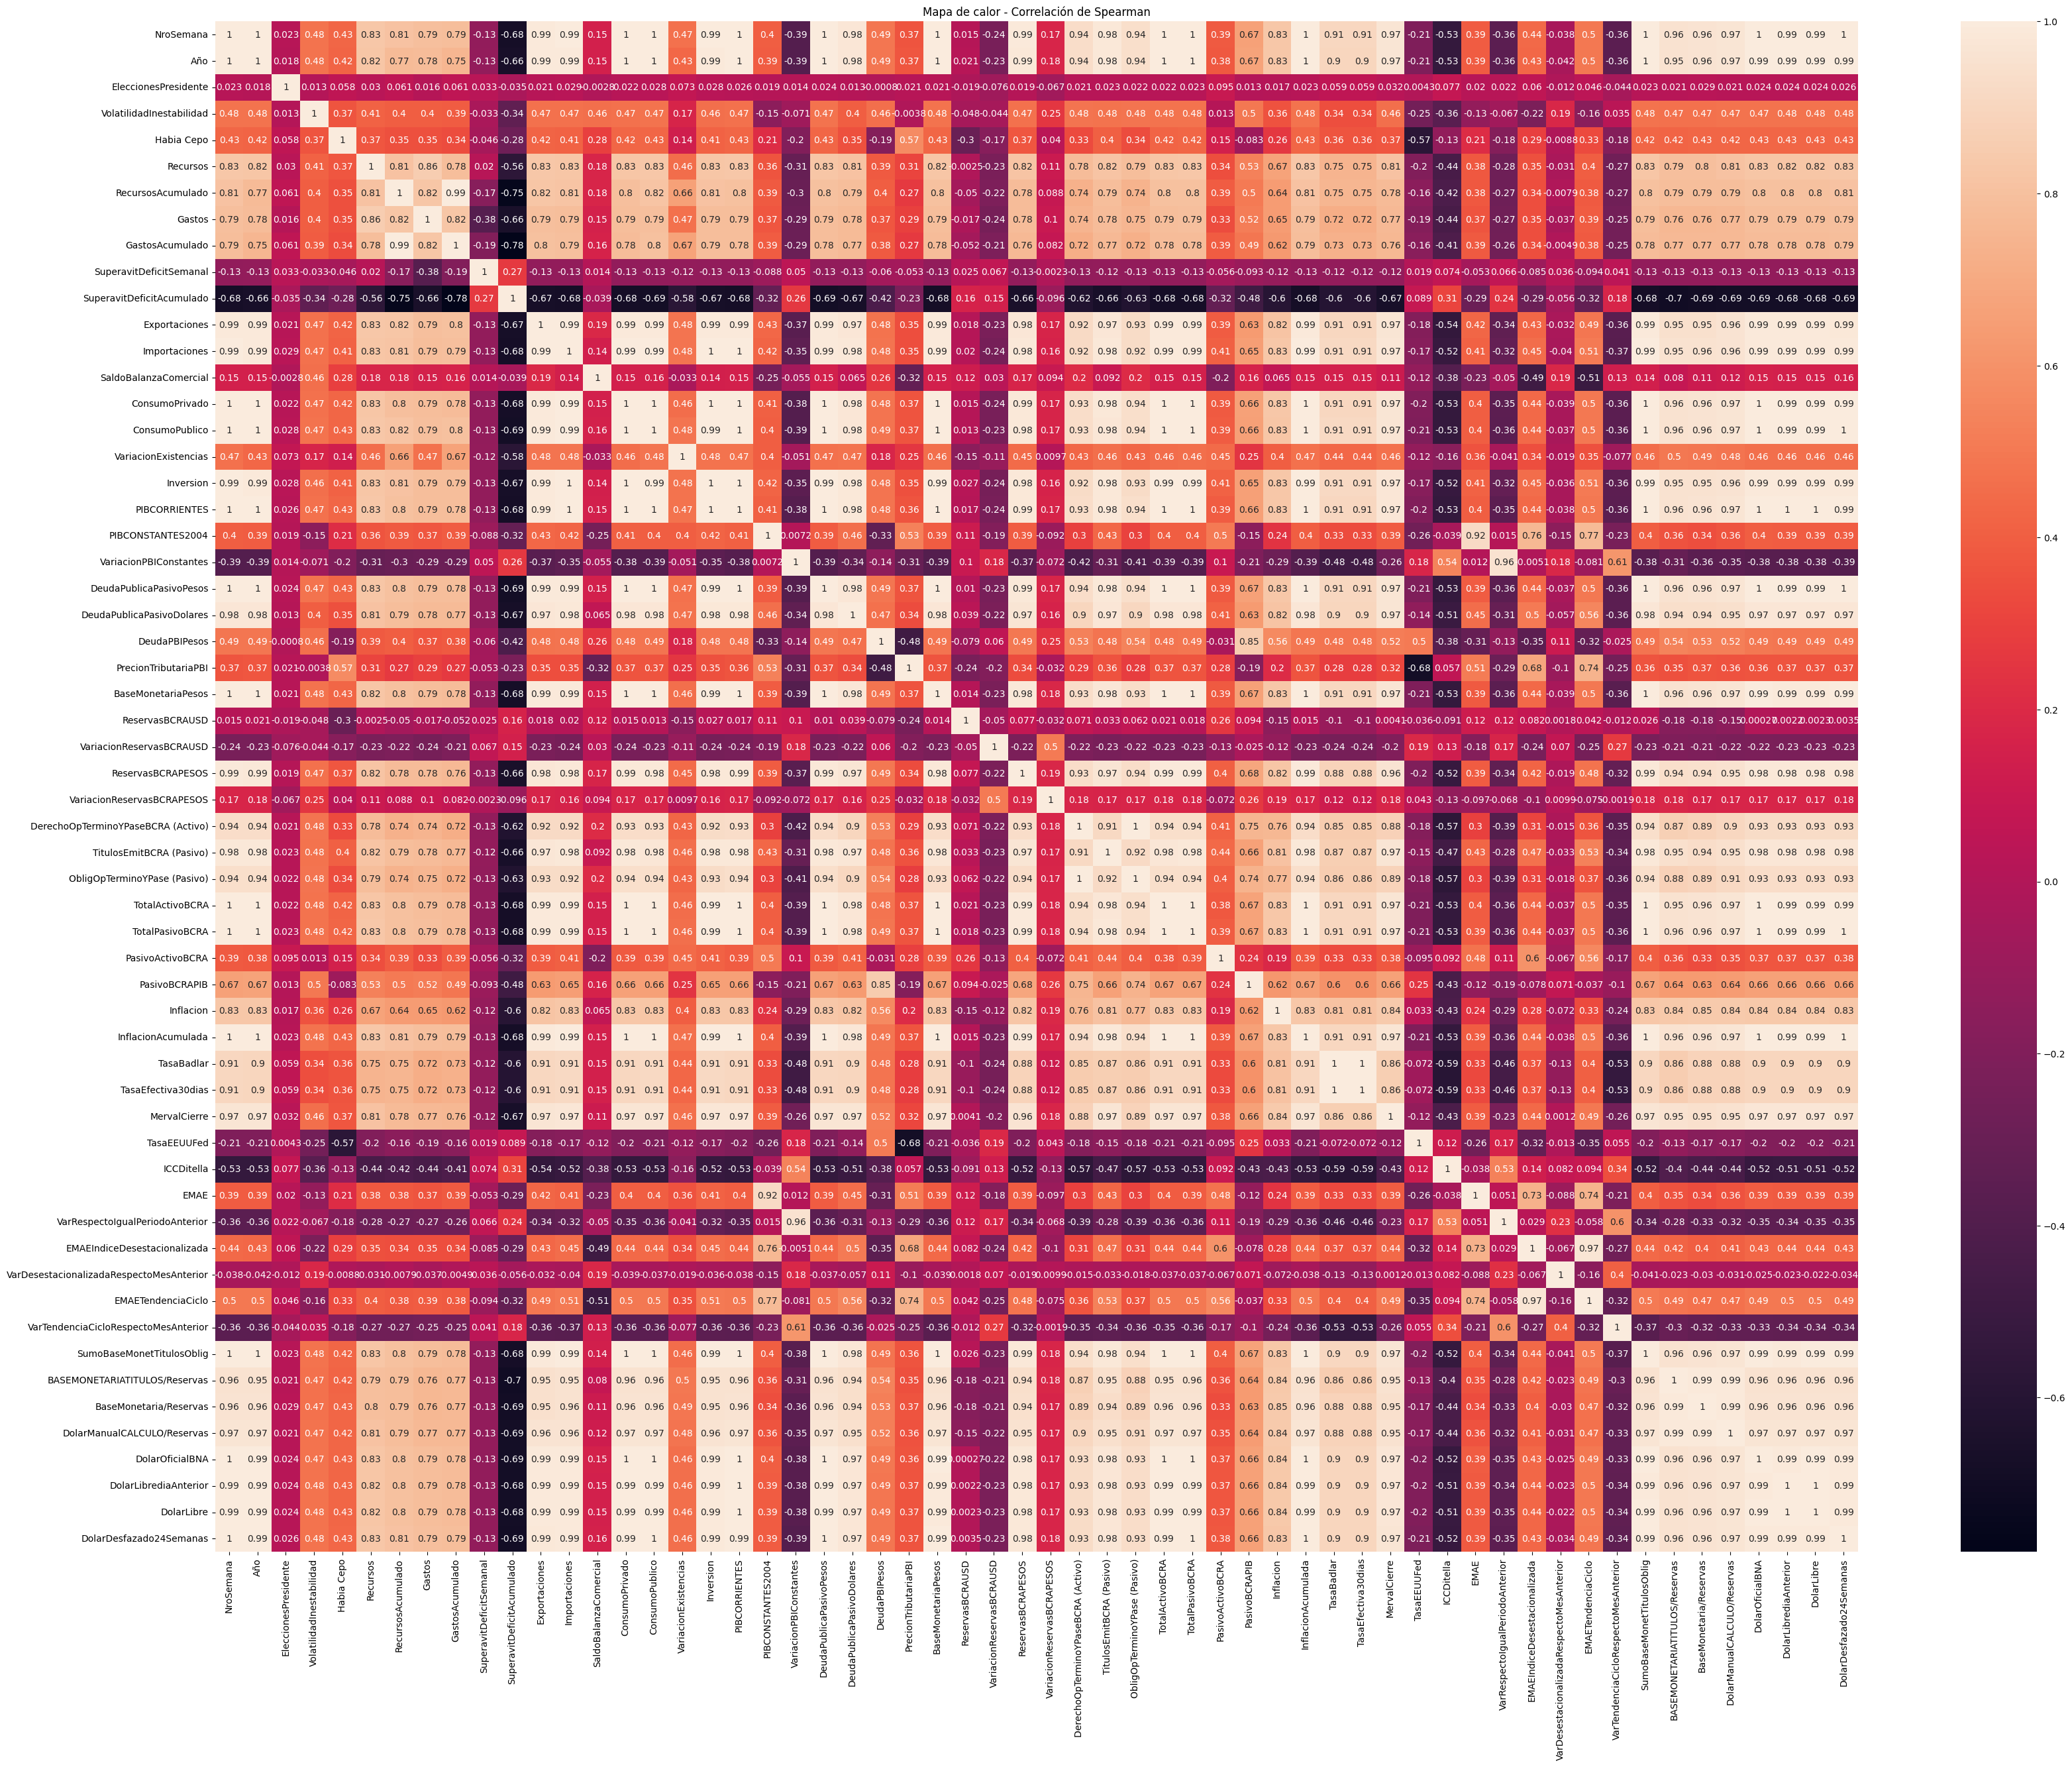

In [10]:
# Calcular la matriz de correlación de Spearman
correlation_matrix = Proyecto.corr(method='spearman')

# Crear el gráfico de mapa de calor
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Mapa de calor - Correlación de Spearman')
plt.show()

In [30]:
# Base de Datos Integral REDUCIDA con toda la información Contable, Macroeconómica, Cambiaria y Financiera entre el 2006 y 2021 y sus Hitos Históricos
ProyectoReducido = pd.read_excel("/content/drive/MyDrive/Desafios Coderhouse/Desafio 12 Segunda Entrega Proyecto Final/DATASETREDUCIDO-FINAL-Desfazado-SIN-Formulas-InterpolarizadoFinal-14-09-2023.xlsx")
ProyectoReducido

NroSemana   Año  EleccionesPresidente  VolatilidadInestabilidad  \
0            1  2006                     0                         0   
1            2  2006                     0                         0   
2            3  2006                     0                         0   
3            4  2006                     0                         0   
4            5  2006                     0                         0   
..         ...   ...                   ...                       ...   
843        844  2021                     0                         0   
844        845  2021                     0                         0   
845        846  2021                     0                         0   
846        847  2021                     0                         0   
847        848  2021                     0                         0   

     Habia Cepo      Recursos        Gastos  SuperavitDeficitSemanal  \
0             0  0.000000e+00  0.000000e+00             0.000000e+00   
1             0  0.000000e+00  0.000000e+00             0.000000e+00   
2             0  0.000000e+00  0.000000e+00             0.000000e+00   
3             0  4.231208e+09  3.405969e+09             8.252390e+08   
4             0  3.926874e+09  2.170770e+09             1.756104e+09   
..          ...           ...           ...                      ...   
843           1  1.376860e+11  4.543818e+11            -3.166958e+11   
844           1  6.073883e+10  1.868933e+11            -1.261544e+11   
845           1  2.894250e+11  3.057682e+11            -1.634324e+10   
846           1  1.585962e+11  7.170822e+11            -5.584860e+11   
847           1  1.821530e+11  3.340592e+11            -1.519061e+11   

     Exportaciones  Importaciones  ...  EMAETendenciaCiclo  \
0     1.434948e+11   1.114727e+11  ...          112.681311   
1     1.434948e+11   1.114727e+11  ...          112.681311   
2     1.434948e+11   1.114727e+11  ...          112.681311   
3     1.434948e+11   1.114727e+11  ...          112.681311   
4     1.434948e+11   1.114727e+11  ...          113.464197   
..             ...            ...  ...                 ...   
843   9.010955e+12   8.129906e+12  ...          147.020436   
844   9.010955e+12   8.129906e+12  ...          147.020436   
845   9.010955e+12   8.129906e+12  ...          147.020436   
846   9.010955e+12   8.129906e+12  ...          147.020436   
847   9.010955e+12   8.129906e+12  ...          147.020436   

     VarTendenciaCicloRespectoMesAnterior  SumoBaseMonetTitulosOblig  \
0                                0.668736               8.954188e+10   
1                                0.668736               8.992242e+10   
2                                0.668736               9.020395e+10   
3                                0.668736               9.059158e+10   
4                                0.694780               8.875241e+10   
..                                    ...                        ...   
843                              0.571230               1.248447e+13   
844                              0.571230               1.254044e+13   
845                              0.571230               1.331530e+13   
846                              0.571230               1.360580e+13   
847                              0.571230               1.389630e+13   

     BASEMONETARIATITULOS/Reservas  BaseMonetaria/Reservas  \
0                         4.779259                3.198790   
1                         4.767838                3.209001   
2                         4.726559                3.141368   
3                         4.601086                3.036630   
4                         4.464495                2.961393   
..                             ...                     ...   
843                     193.574626               78.968138   
844                     192.468129               77.779935   
845                     215.702039               89.124281   
846                     217.521167           

In [12]:
ProyectoReducido.corr(method = 'spearman')

NroSemana       Año  \
NroSemana                                  1.000000  0.998046   
Año                                        0.998046  1.000000   
EleccionesPresidente                       0.023346  0.018378   
VolatilidadInestabilidad                   0.475069  0.476594   
Habia Cepo                                 0.425624  0.422394   
Recursos                                   0.828526  0.819311   
Gastos                                     0.793237  0.779213   
SuperavitDeficitSemanal                   -0.132668 -0.125927   
Exportaciones                              0.991049  0.987519   
Importaciones                              0.993355  0.990242   
SaldoBalanzaComercial                      0.151911  0.147477   
PIBCORRIENTES                              0.999210  0.997286   
PIBCONSTANTES2004                          0.396899  0.394671   
VariacionPBIConstantes                    -0.388356 -0.389144   
DeudaPublicaPasivoPesos                    0.999373  0.997606   
DeudaPublicaPasivoDolares                  0.978240  0.975583   
DeudaPBIPesos                              0.486448  0.487391   
BaseMonetariaPesos                         0.998333  0.996160   
ReservasBCRAUSD                            0.014747  0.020733   
ReservasBCRAPESOS                          0.986161  0.985994   
DerechoOpTerminoYPaseBCRA (Activo)         0.936749  0.937363   
TitulosEmitBCRA (Pasivo)                   0.980233  0.980086   
ObligOpTerminoYPase (Pasivo)               0.941236  0.941737   
TotalActivoBCRA                            0.998834  0.997590   
TotalPasivoBCRA                            0.999541  0.997853   
Inflacion                                  0.827786  0.828413   
InflacionAcumulada                         0.999986  0.998059   
TasaBadlar                                 0.908471  0.902533   
TasaEfectiva30dias                         0.908471  0.902533   
MervalCierre                               0.970959  0.969838   
TasaEEUUFed                               -0.209230 -0.206998   
ICCDitella                                -0.533392 -0.534170   
EMAE                                       0.393120  0.393379   
VarRespectoIgualPeriodoAnterior           -0.357811 -0.358391   
EMAEIndiceDesestacionalizada               0.437283  0.433238   
VarDesestacionalizadaRespectoMesAnterior  -0.037894 -0.041731   
EMAETendenciaCiclo                         0.496828  0.495066   
VarTendenciaCicloRespectoMesAnterior      -0.358871 -0.360149   
SumoBaseMonetTitulosOblig                  0.998043  0.996821   
BASEMONETARIATITULOS/Reservas              0.956375  0.953555   
BaseMonetaria/Reservas                     0.962164  0.959347   
DolarManualCALCULO/Reservas                0.968631  0.967125   
DolarOficialBNA                            0.995999  0.994491   
DolarLibrediaAnterior                      0.994900  0.993163   
DolarLibre                                 0.994900  0.993119   
DolarDesfazado24Semanas                    0.995688  0.993500   

                                          EleccionesPresidente  \
NroSemana                                             0.023346   
Año                                                   0.018378   
EleccionesPresidente                                  1.000000   
VolatilidadInestabilidad                              0.012948   
Habia Cepo                                            0.057836   
Recursos                                              0.030108   
Gastos                                                0.016372   
SuperavitDeficitSemanal                               0.032983   
Exportaciones                                         0.020980   
Importaciones                                         0.028860   
SaldoBalanzaComercial                                -0.002822   
PIBCORRIENTES                                         0.025506   
PIBCONSTANTES2004                                     0.018530   
VariacionPBIConstantes                                0.014324

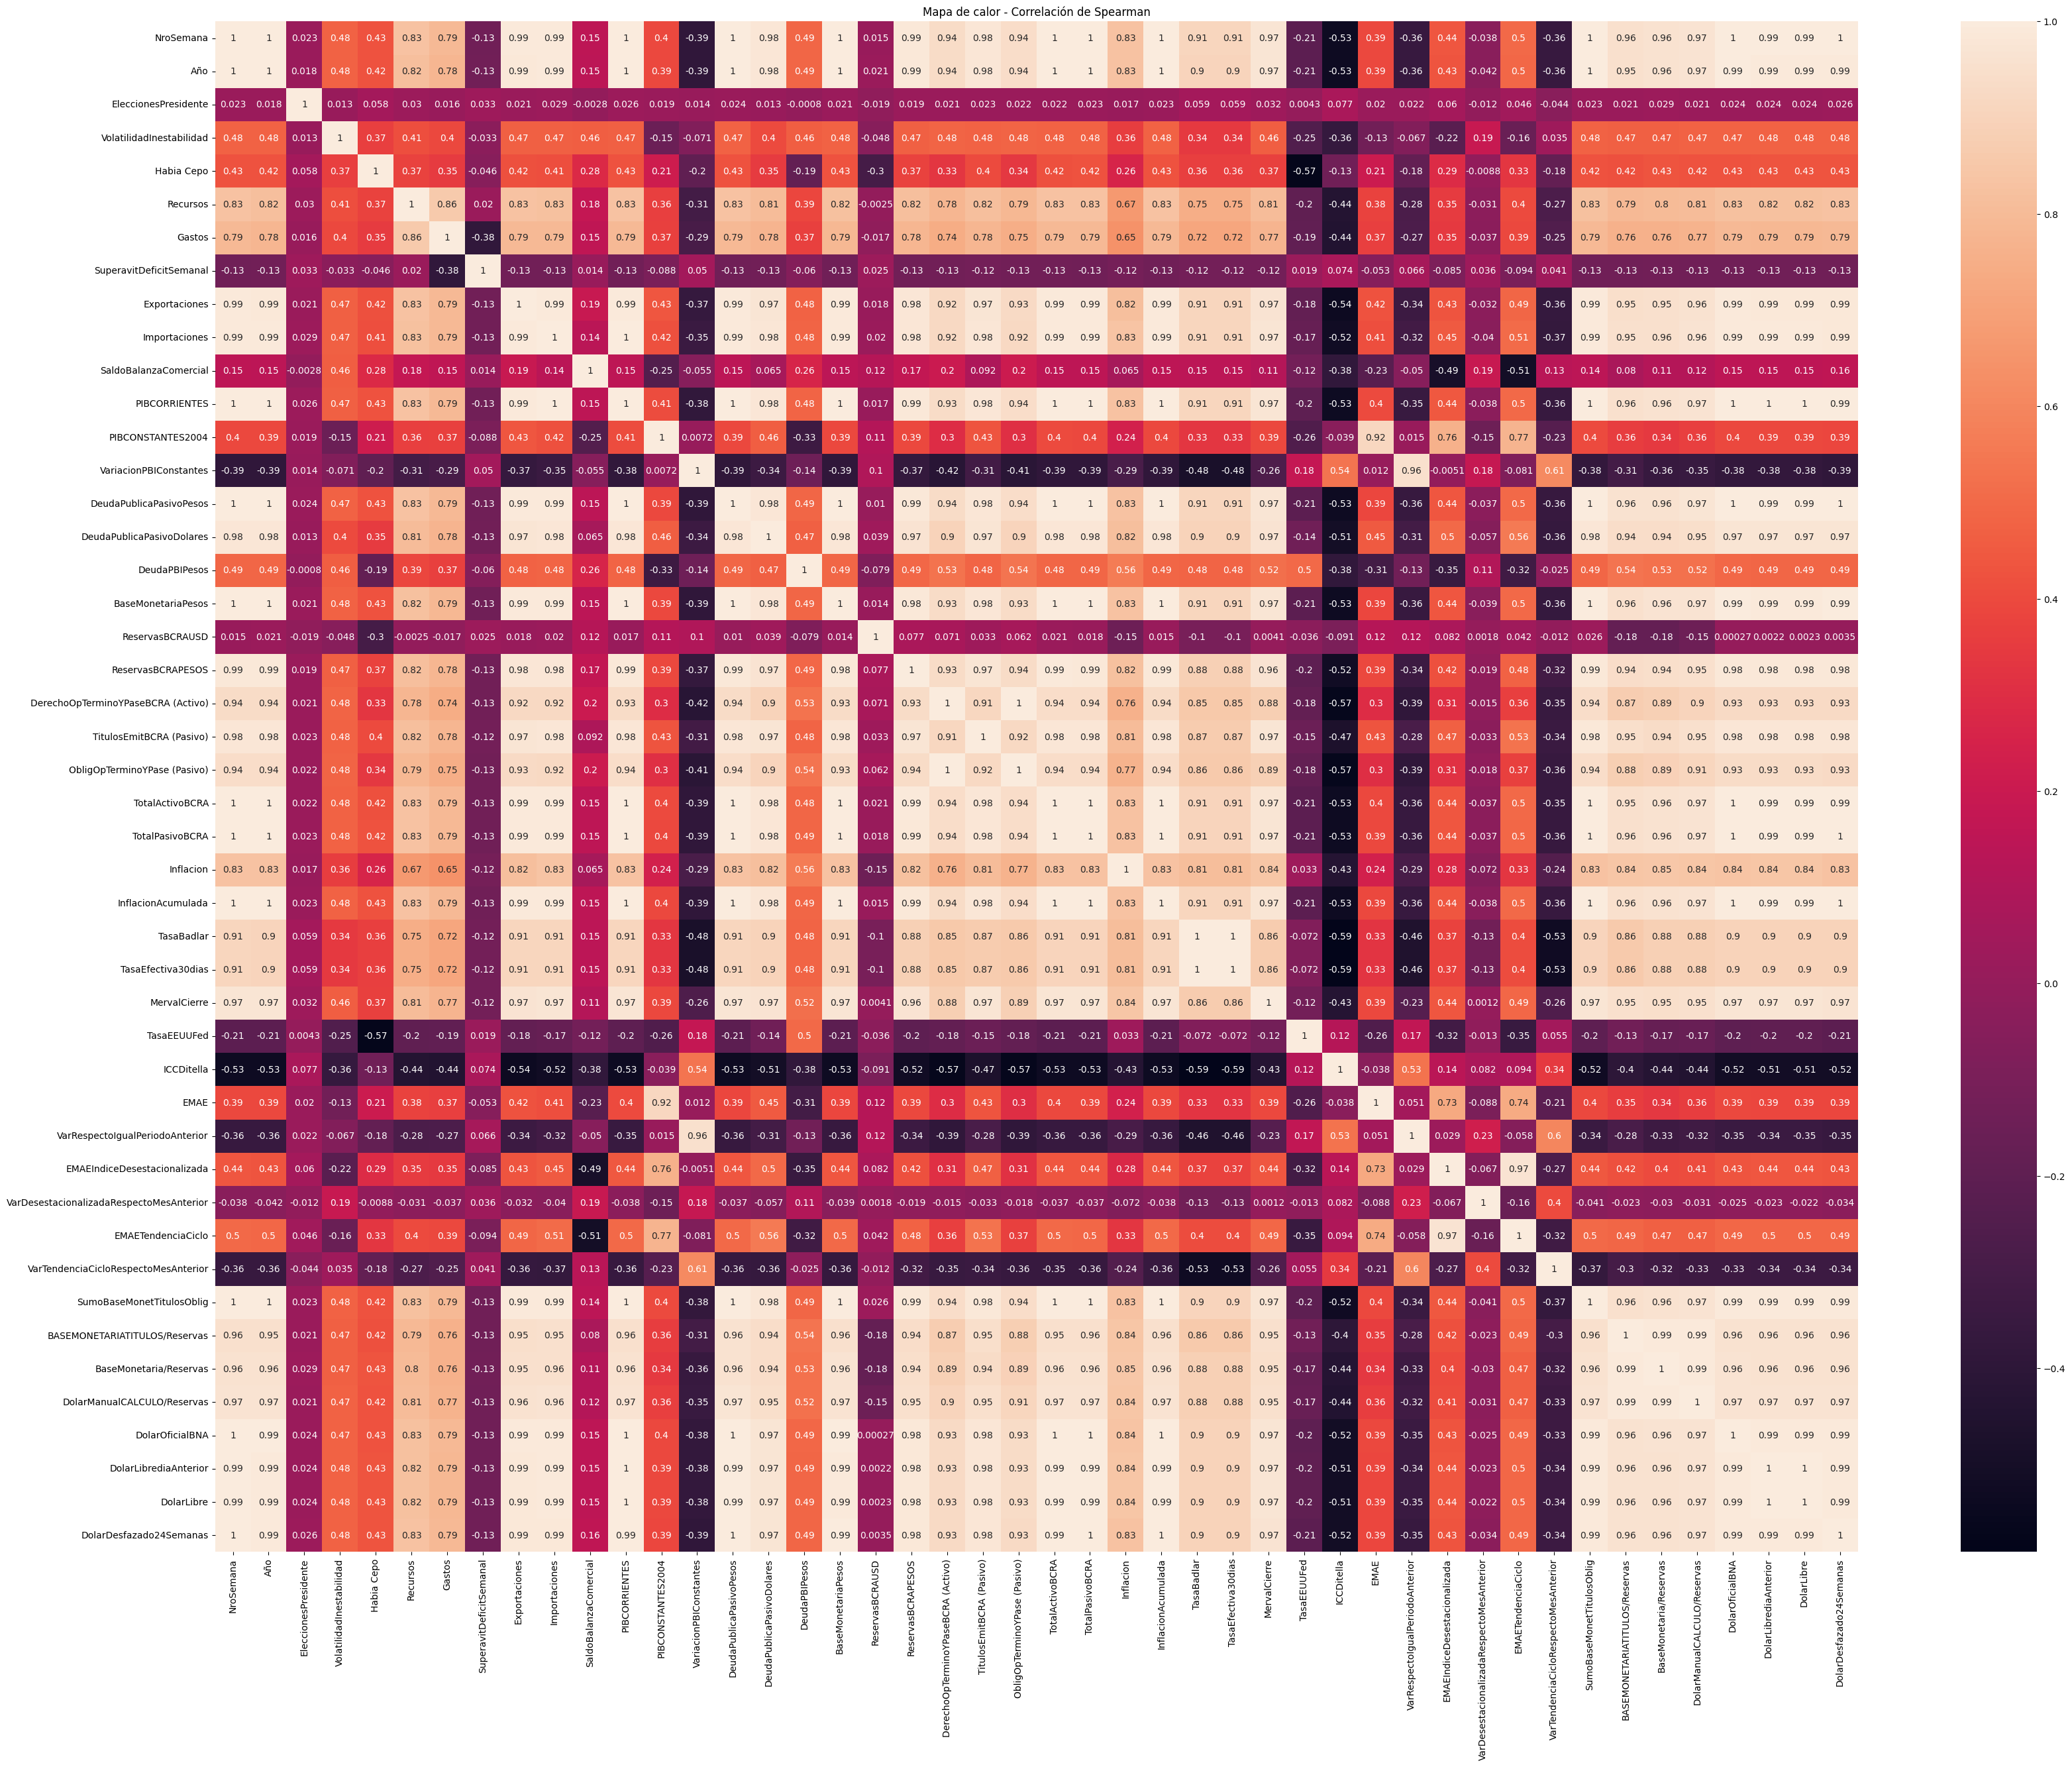

In [13]:
# Calcular la matriz de correlación de Spearman
correlation_matrix = ProyectoReducido.corr(method='spearman')

# Crear el gráfico de mapa de calor
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Mapa de calor - Correlación de Spearman')
plt.show()

In [31]:
# Base de Datos Integral REDUCIDA AUN MAS -  con toda la información Contable, Macroeconómica, Cambiaria y Financiera entre el 2006 y 2021 y sus Hitos Históricos
ProyectoReducidoTotal = pd.read_excel("/content/drive/MyDrive/Desafios Coderhouse/Desafio 12 Segunda Entrega Proyecto Final/DATASETREDUCIDOTOTAL-FINAL-Desfazado-SIN-Formulas-InterpolarizadoFinal-14-09-2023.xlsx")
ProyectoReducidoTotal

NroSemana   Año  EleccionesPresidente  VolatilidadInestabilidad  \
0            1  2006                     0                         0   
1            2  2006                     0                         0   
2            3  2006                     0                         0   
3            4  2006                     0                         0   
4            5  2006                     0                         0   
..         ...   ...                   ...                       ...   
843        844  2021                     0                         0   
844        845  2021                     0                         0   
845        846  2021                     0                         0   
846        847  2021                     0                         0   
847        848  2021                     0                         0   

     Habia Cepo  SaldoBalanzaComercial  PIBCORRIENTES  PIBCONSTANTES2004  \
0             0           3.202206e+10   6.435624e+11       5.323482e+11   
1             0           3.202206e+10   6.435624e+11       5.323482e+11   
2             0           3.202206e+10   6.435624e+11       5.323482e+11   
3             0           3.202206e+10   6.435624e+11       5.323482e+11   
4             0           3.202206e+10   6.435624e+11       5.323482e+11   
..          ...                    ...            ...                ...   
843           1           8.810491e+11   5.441556e+13       6.986581e+11   
844           1           8.810491e+11   5.441556e+13       6.986581e+11   
845           1           8.810491e+11   5.441556e+13       6.986581e+11   
846           1           8.810491e+11   5.441556e+13       6.986581e+11   
847           1           8.810491e+11   5.441556e+13       6.986581e+11   

     BaseMonetariaPesos  ReservasBCRAUSD  ...  EMAETendenciaCiclo  \
0          5.993099e+10     1.873552e+10  ...          112.681311   
1          6.052243e+10     1.886021e+10  ...          112.681311   
2          5.995140e+10     1.908449e+10  ...          112.681311   
3          5.978874e+10     1.968917e+10  ...          112.681311   
4          5.887133e+10     1.987961e+10  ...          113.464197   
..                  ...              ...  ...                 ...   
843        3.257431e+12     4.124995e+10  ...          147.020436   
844        3.197164e+12     4.110526e+10  ...          147.020436   
845        3.489784e+12     3.915638e+10  ...          147.020436   
846        3.571910e+12     3.940941e+10  ...          147.020436   
847        3.654036e+12     3.966244e+10  ...          147.020436   

     VarTendenciaCicloRespectoMesAnterior  SumoBaseMonetTitulosOblig  \
0                                0.668736               8.954188e+10   
1                                0.668736               8.992242e+10   
2                                0.668736               9.020395e+10   
3                                0.668736               9.059158e+10   
4                                0.694780               8.875241e+10   
..                                    ...                        ...   
843                              0.571230               1.248447e+13   
844                              0.571230               1.254044e+13   
845                              0.571230               1.331530e+13   
846                              0.571230               1.360580e+13   
847                              0.571230               1.389630e+13   

     BASEMONETARIATITULOS/Reservas  BaseMonetaria/Reservas  \
0                         4.779259                3.198790   
1                         4.767838                3.209001   
2                         4.726559                3.141368   
3                         4.601086                3.036630   
4                         4.464495                2.961393   
..                             ...                     ...   
843                     193.574626               78.968138   
844                     192.468129   

In [33]:
ProyectoReducidoTotal.corr(method = 'spearman')

NroSemana       Año  \
NroSemana                                  1.000000  0.998046   
Año                                        0.998046  1.000000   
EleccionesPresidente                       0.023346  0.018378   
VolatilidadInestabilidad                   0.475069  0.476594   
Habia Cepo                                 0.425624  0.422394   
SaldoBalanzaComercial                      0.151911  0.147477   
PIBCORRIENTES                              0.999210  0.997286   
PIBCONSTANTES2004                          0.396899  0.394671   
BaseMonetariaPesos                         0.998333  0.996160   
ReservasBCRAUSD                            0.014747  0.020733   
ReservasBCRAPESOS                          0.986161  0.985994   
Inflacion                                  0.827786  0.828413   
TasaBadlar                                 0.908471  0.902533   
TasaEfectiva30dias                         0.908471  0.902533   
MervalCierre                               0.970959  0.969838   
TasaEEUUFed                               -0.209230 -0.206998   
ICCDitella                                -0.533392 -0.534170   
EMAE                                       0.393120  0.393379   
VarRespectoIgualPeriodoAnterior           -0.357811 -0.358391   
EMAEIndiceDesestacionalizada               0.437283  0.433238   
VarDesestacionalizadaRespectoMesAnterior  -0.037894 -0.041731   
EMAETendenciaCiclo                         0.496828  0.495066   
VarTendenciaCicloRespectoMesAnterior      -0.358871 -0.360149   
SumoBaseMonetTitulosOblig                  0.998043  0.996821   
BASEMONETARIATITULOS/Reservas              0.956375  0.953555   
BaseMonetaria/Reservas                     0.962164  0.959347   
DolarManualCALCULOReservas                 0.968631  0.967125   
DolarOficialBNA                            0.995999  0.994491   
DolarLibrediaAnterior                      0.994900  0.993163   
DolarLibre                                 0.994900  0.993119   
DolarDesfazado24Semanas                    0.995688  0.993500   

                                          EleccionesPresidente  \
NroSemana                                             0.023346   
Año                                                   0.018378   
EleccionesPresidente                                  1.000000   
VolatilidadInestabilidad                              0.012948   
Habia Cepo                                            0.057836   
SaldoBalanzaComercial                                -0.002822   
PIBCORRIENTES                                         0.025506   
PIBCONSTANTES2004                                     0.018530   
BaseMonetariaPesos                                    0.020631   
ReservasBCRAUSD                                      -0.019140   
ReservasBCRAPESOS                                     0.019460   
Inflacion                                             0.016668   
TasaBadlar                                            0.058513   
TasaEfectiva30dias                                    0.058513   
MervalCierre                                          0.031758   
TasaEEUUFed                                           0.004314   
ICCDitella                                            0.076668   
EMAE                                                  0.020285   
VarRespectoIgualPeriodoAnterior                       0.022468   
EMAEIndiceDesestacionalizada                          0.060430   
VarDesestacionalizadaRespectoMesAnterior             -0.011766   
EMAETendenciaCiclo                                    0.046001   
VarTendenciaCicloRespectoMesAnterior                 -0.043605   
SumoBaseMonetTitulosOblig                             0.022814   
BASEMONETARIATITULOS/Reservas                         0.020524   
BaseMonetaria/Reservas                                0.028511   
DolarManualCALCULOReservas                            0.021004   
DolarOficialBNA                                       0.023985   
DolarLibrediaAnterior                          

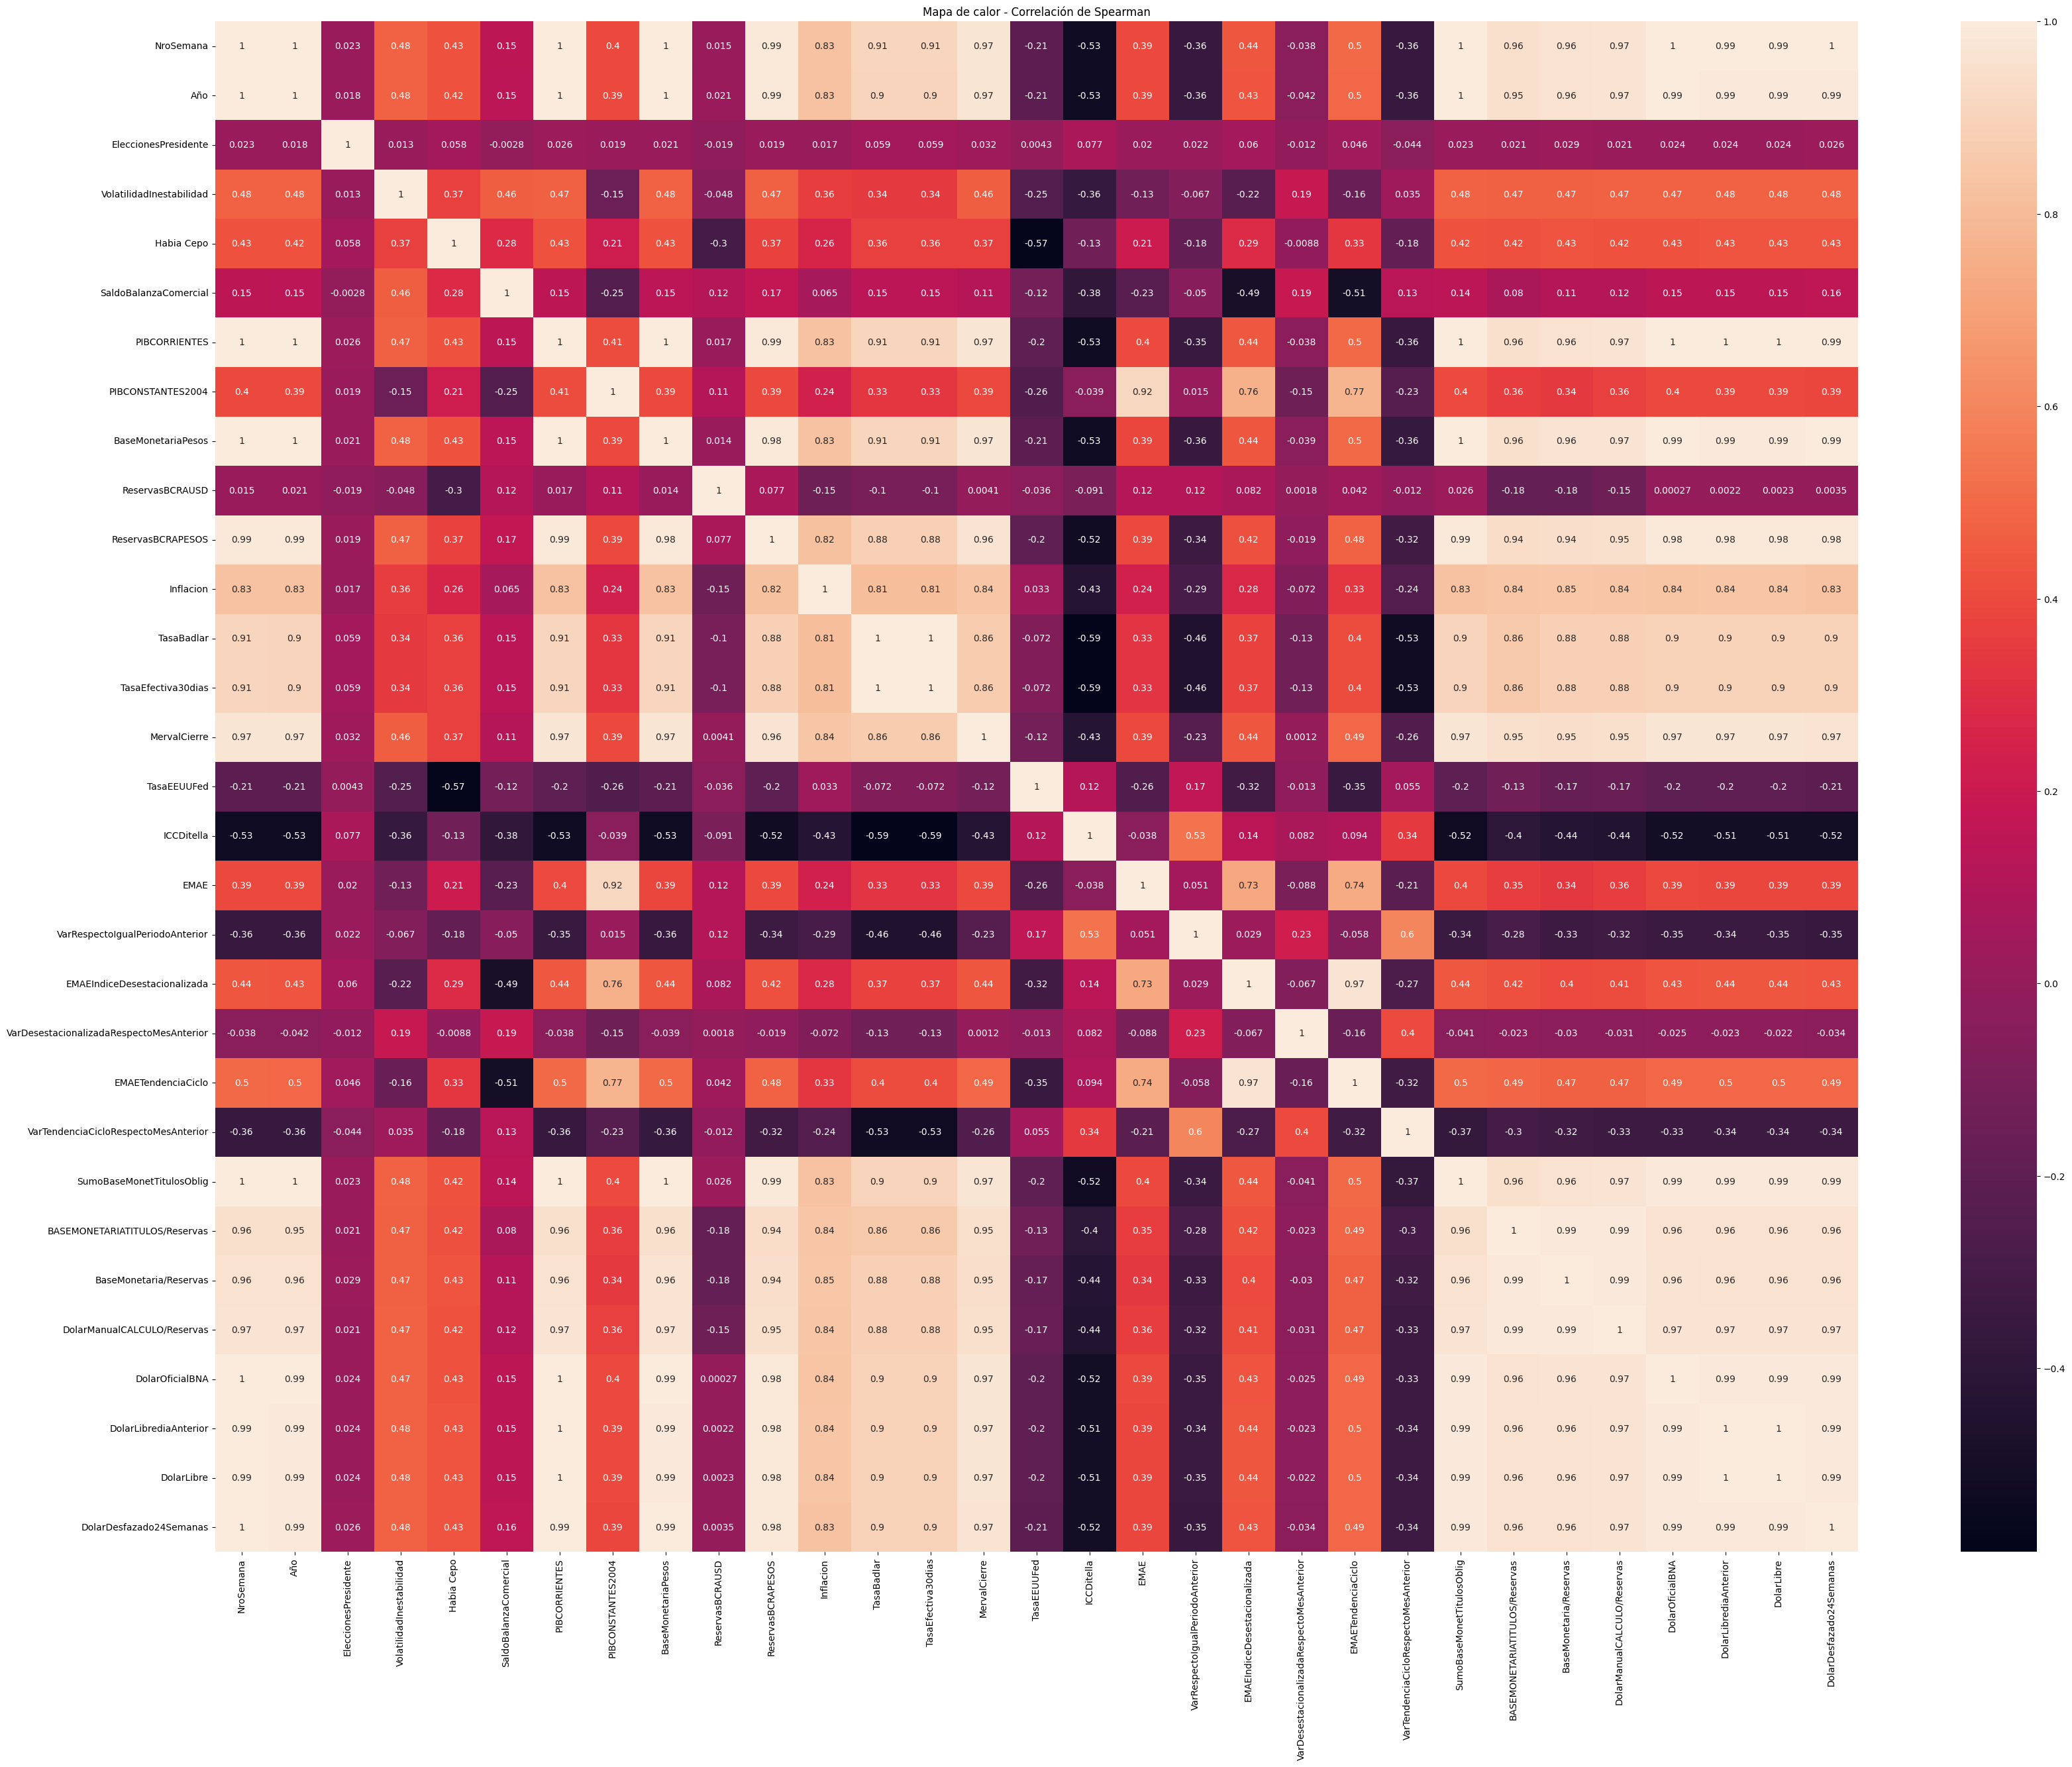

In [16]:
# Calcular la matriz de correlación de Spearman
correlation_matrix = ProyectoReducidoTotal.corr(method='spearman')

# Crear el gráfico de mapa de calor
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Mapa de calor - Correlación de Spearman')
plt.show()

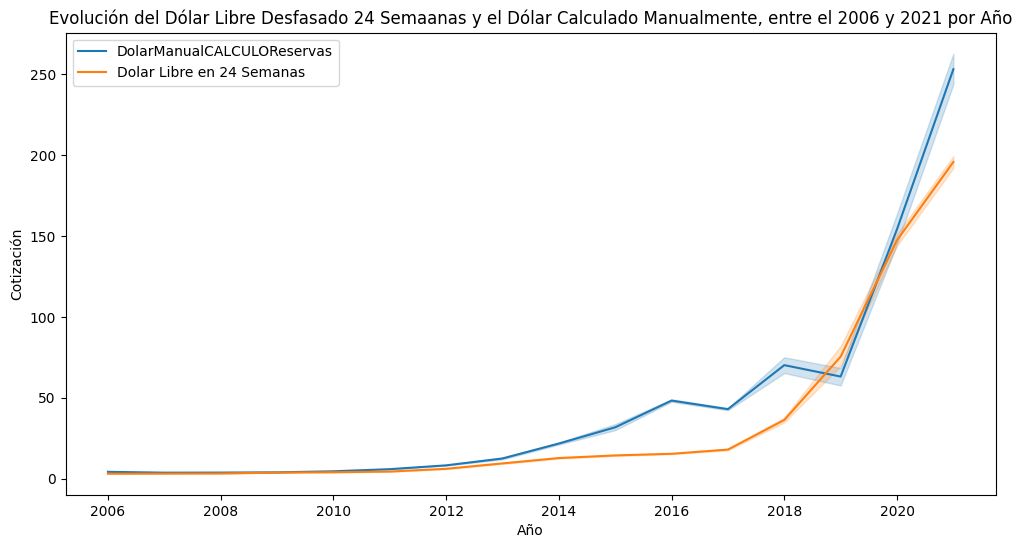

In [35]:
# Podemos ver que el Dolar Libre Desfasado sigue la tendencia que le va marcando el Dólar Calculado Manualmente apra este Proyecto
plt.figure(figsize=(12, 6))  # Aumentamos el ancho a 12 pulgadas

# Utilizamos Seaborn para graficar la evolución de ambas variables a lo largo del tiempo
sns.lineplot(x="Año", y="DolarManualCALCULOReservas", data=ProyectoReducidoTotal, label="DolarManualCALCULOReservas")
sns.lineplot(x="Año", y="DolarDesfazado24Semanas", data=ProyectoReducidoTotal, label="Dolar Libre en 24 Semanas")

plt.xlabel("Año")
plt.ylabel("Cotización")
plt.title("Evolución del Dólar Libre Desfasado 24 Semaanas y el Dólar Calculado Manualmente, entre el 2006 y 2021 por Año")
plt.legend()
plt.show()

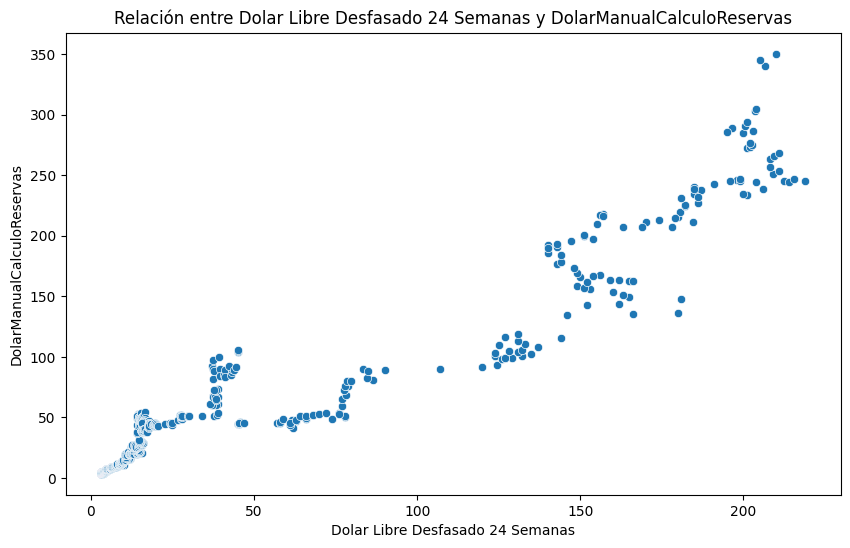

In [37]:
# Gráfico de puntos para relacionar 'DolarDesfazado24Semanas' y 'DolarManualCalculoReservas'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ProyectoReducidoTotal, x='DolarDesfazado24Semanas', y='DolarManualCALCULOReservas')
plt.title('Relación entre Dolar Libre Desfasado 24 Semanas y DolarManualCalculoReservas')
plt.xlabel('Dolar Libre Desfasado 24 Semanas')
plt.ylabel('DolarManualCalculoReservas')
plt.show()

# Se concluye que existe una muy fuerte relación Positiva entre el Dolar Libre Desfasado 24 Semanas y el Dolar construído en este trabajo.
# El dolar que se expone en la variable "DolarManualCalculoReservas" surge de hacer el cociente entre (Base Monetaria + Títulos Emitidos + Leliqs + Obligaciones de Pase) / El total de Reservas en USD que el BCRA tiene en ese momento

In [41]:
# Base Inflacion
Inflacion = pd.read_excel("/content/drive/MyDrive/Desafios Coderhouse/Desafio 12 Segunda Entrega Proyecto Final/InflacionAnualYAcumulada.xlsx")
Inflacion

Año  Inflacion  InflacionAcum
0   2006        9.6            9.6
1   2007        8.1           17.7
2   2008        6.9           24.6
3   2009        7.1           31.7
4   2010       10.0           41.7
5   2011        8.8           50.5
6   2012       10.1           60.6
7   2013       10.2           70.8
8   2014       21.5           92.3
9   2015       17.1          109.4
10  2016       29.0          138.4
11  2017       22.3          160.7
12  2018       39.7          200.4
13  2019       44.0          244.4
14  2020       31.2          275.6
15  2021       41.8          317.4

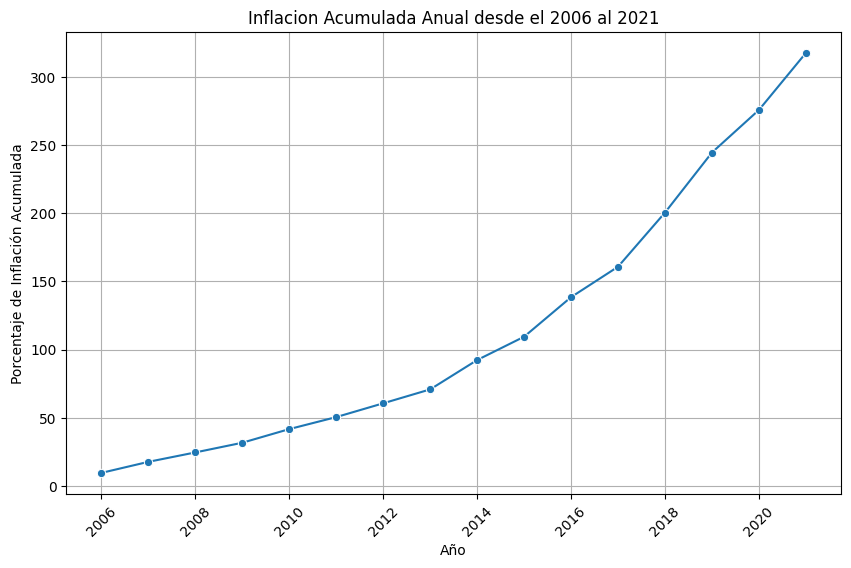

In [43]:
# Crear un gráfico de líneas utilizando Seaborn y Matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='InflacionAcum', data=Inflacion, marker='o')
plt.title('Inflacion Acumulada Anual desde el 2006 al 2021')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Inflación Acumulada')
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

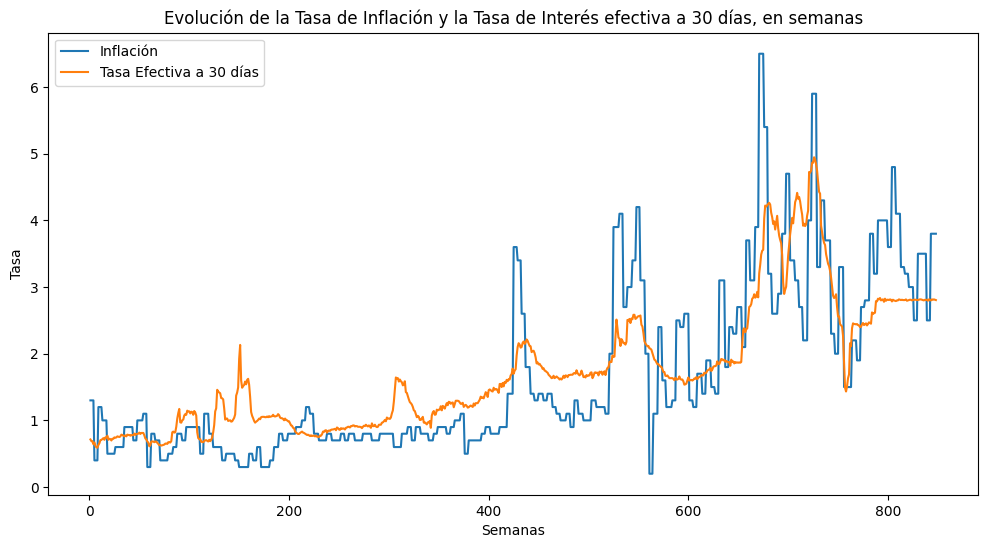

In [40]:
# Evolución de la Tasa de Inflación y la Tasa Efectiva a 30 días
plt.figure(figsize=(12, 6))  # Aumentamos el ancho a 12 pulgadas

# Utilizamos Seaborn para graficar la evolución de ambas variables a lo largo del tiempo
sns.lineplot(x="NroSemana", y="Inflacion", data=Proyecto, label="Inflación")
sns.lineplot(x="NroSemana", y="TasaEfectiva30dias", data=Proyecto, label="Tasa Efectiva a 30 días")

plt.xlabel("Semanas")
plt.ylabel("Tasa")
plt.title("Evolución de la Tasa de Inflación y la Tasa de Interés efectiva a 30 días, en semanas")
plt.legend()
plt.show()